# **Customer Segmentation Project**

# **Step 1 — Data collection & loading**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
print(f"----First 5 Rows------")
print(f"{df.head()}")
print(f"\n----Shape of the dataset (Rows, Columns)----")
print(f"{df.shape}")
print(f"\n----Summary of columns and data types----")
print(f"{df.info()}")
print(f"\n----Quick Statistics for Numeric Columns-----")
print(f"{df.describe()}")
print(f"\n-----Checking for missing values-----")
print(f"{df.isnull().sum()}")

----First 5 Rows------
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

----Shape of the dataset (Rows, Columns)----
(200, 5)

----Summary of columns and data types----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-

# **Step 2 — Exploratory Data Analysis (EDA)**

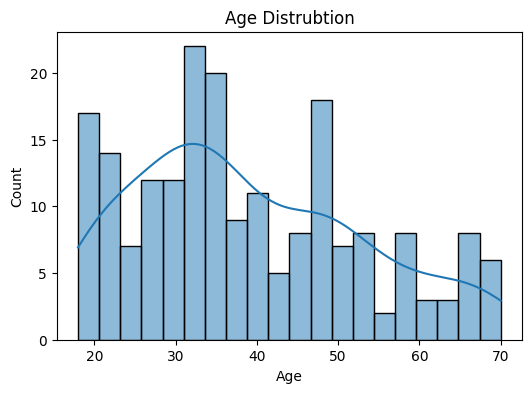

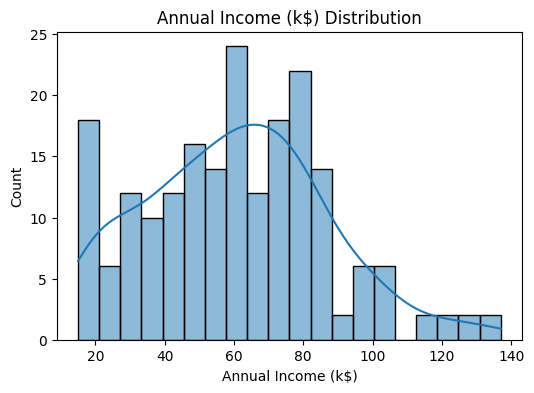

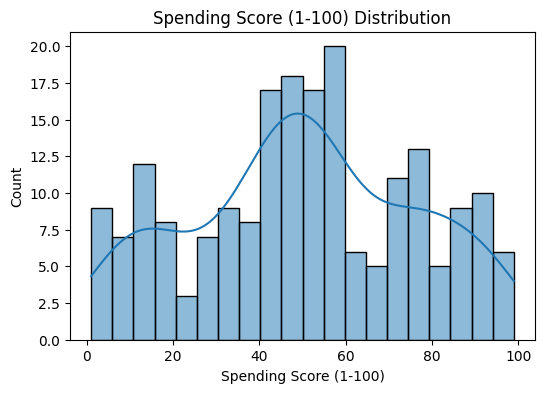

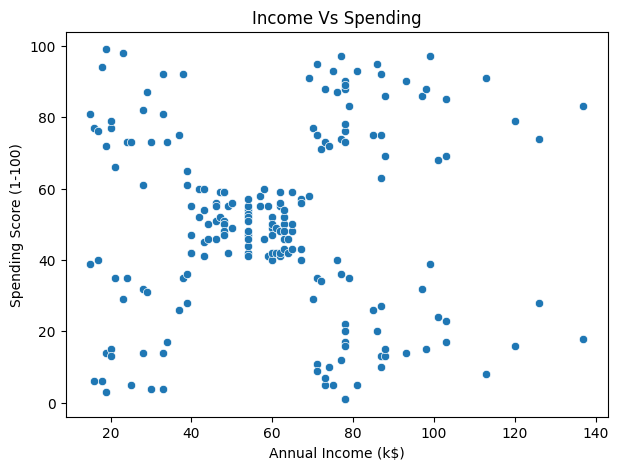

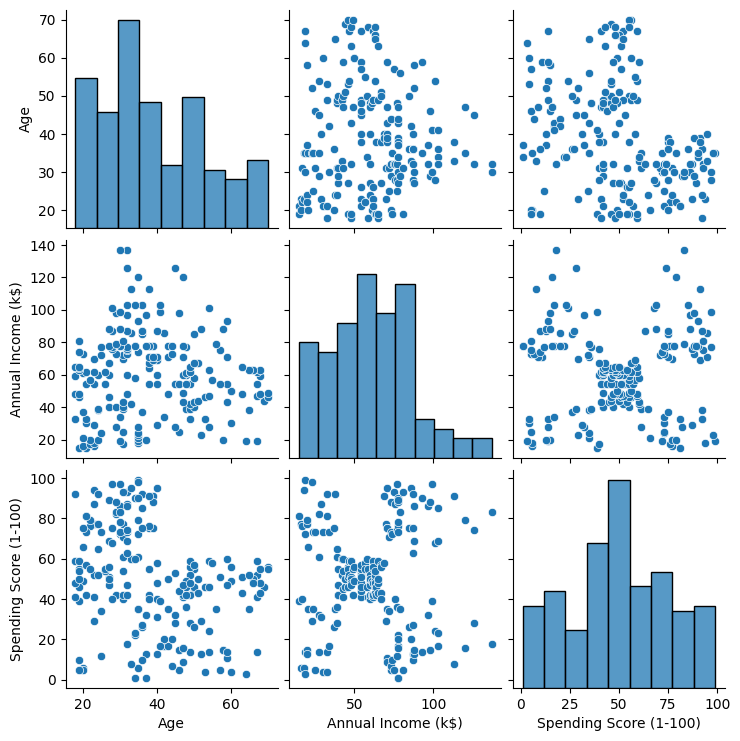

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Distribution of Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distrubtion')
plt.show()

#Distribution of Annual Income (k$)
plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income (k$) Distribution')
plt.show()

#Spending Score (1-100)
plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score (1-100) Distribution')
plt.show()

#Relationship Income Vs Spending
plt.figure(figsize=(7,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Income Vs Spending')
plt.show()

#pairplot (Age, Income, Spending)
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

# **Step 3 — Feature Selection & Preprocessing**

In [6]:
from sklearn.preprocessing import StandardScaler
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

# **Step 4 — Choosing the right number of clusters**

**1) Elbow Method (visual approach)**

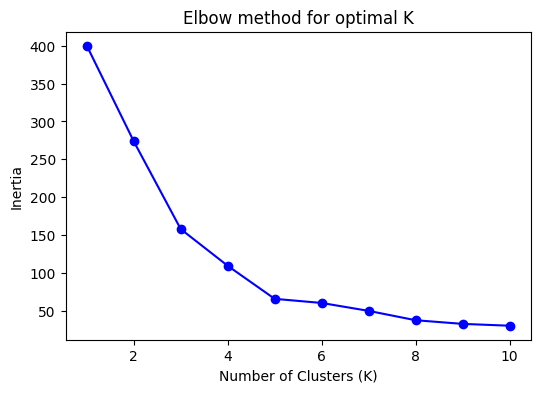

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1,11)

for k in K:
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(X_scaled)
  inertia.append(model.inertia_)
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel("Inertia")
plt.title("Elbow method for optimal K")
plt.show()


**2) Silhouette Score (numerical approach)**

In [8]:
from sklearn.metrics import silhouette_score
for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=42)
  labels = model.fit_predict(X_scaled)
  score = silhouette_score(X_scaled, labels)
  print(f"K= {k}, Silhouette_score = {score:.3f}")


K= 2, Silhouette_score = 0.397
K= 3, Silhouette_score = 0.467
K= 4, Silhouette_score = 0.494
K= 5, Silhouette_score = 0.555
K= 6, Silhouette_score = 0.514
K= 7, Silhouette_score = 0.502
K= 8, Silhouette_score = 0.455
K= 9, Silhouette_score = 0.457
K= 10, Silhouette_score = 0.445


# **Step 5 — Running K-Means and Assigning Cluster Labels**

**1) Running K-Means in Python**

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state = 42)
clusters = kmeans.fit_predict(X_scaled)

#Add cluster label to data set
df['Clusters'] = clusters

print(f"{df.head()}")

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Clusters  
0         4  
1         2  
2         4  
3         2  
4         4  


**2) Checking the cluster centers**

In [10]:
print(f"Cluster center (scaled):\n", kmeans.cluster_centers_)

#Cluster center (back to origonal scale)
center = scaler.inverse_transform(kmeans.cluster_centers_)
print(f"Cluster centers (Origonal Scale): \n{center}")

Cluster center (scaled):
 [[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]
Cluster centers (Origonal Scale): 
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


# **Step 6 — Profiling the Clusters**

In [11]:
cluster_profile = df.groupby('Clusters')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_profile

,Annual Income (k$),Spending Score (1-100)
Clusters,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


# **Step 7 — Visualizing Clusters**

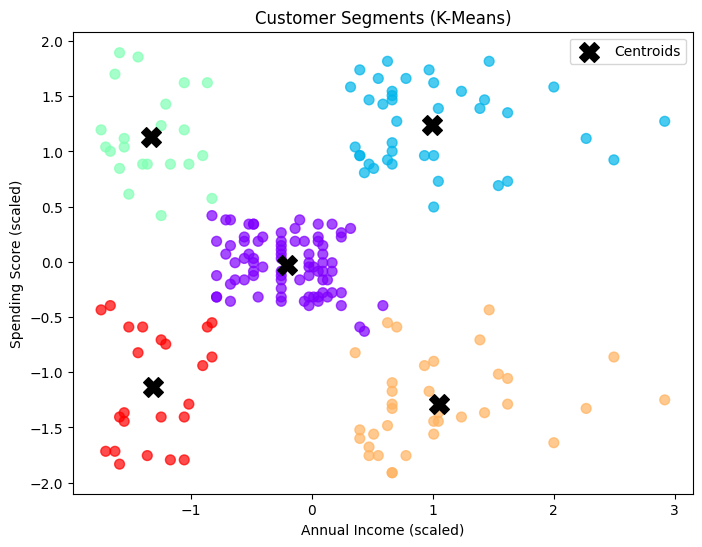

In [12]:
plt.figure(figsize=(8,6))

# Plot customers
plt.scatter(X_scaled[:,0], X_scaled[:,1],
            c=df['Clusters'], cmap='rainbow', s=50, alpha=0.7)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],
            c='black', s=200, marker='X', label='Centroids')

plt.title("Customer Segments (K-Means)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()


# **Step 8 — Other Clustering Algorithms (beyond K-Means)**

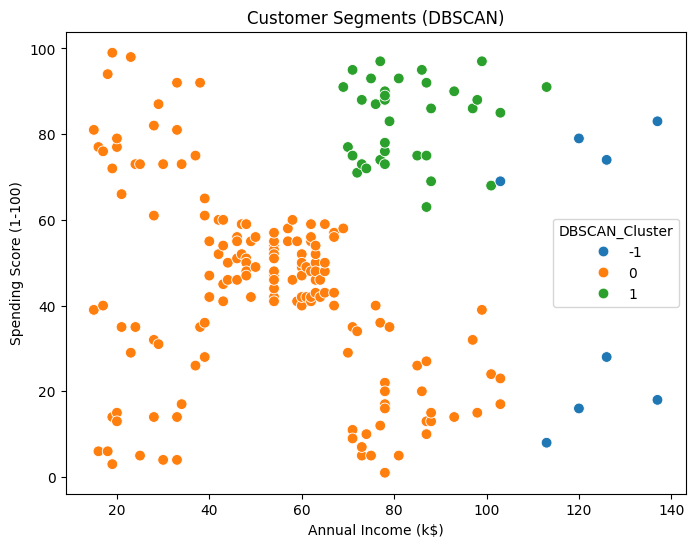

In [13]:
from sklearn.cluster import DBSCAN

# Run DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps = neighborhood size
db_labels = dbscan.fit_predict(X_scaled)

# Add labels to DataFrame
df['DBSCAN_Cluster'] = db_labels

# Visualize DBSCAN result
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='DBSCAN_Cluster', data=df, palette='tab10', s=60)
plt.title("Customer Segments (DBSCAN)")
plt.show()


In [14]:
# Save results with K-Means clusters
df.to_csv("Mall_Customers_with_clusters.csv", index=False)
print("File saved successfully!")


File saved successfully!
